# Exploratory Data Analysis (EDA)

# Data Inspection:

In [1]:
#Loadthe dataset and inspect the first few rows to understand its structure.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

dtype = {'Unnamed: 22': str}  
df = pd.read_csv('Amazon Sale Report.csv', dtype=dtype)

df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [2]:
# Check the data types of each column
print(df.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object


In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(df.duplicated().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64
0


# Summary Statistics:

In [4]:
# Summary statistics for numerical columns
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [5]:
# Summary statistics for categorical columns
df.describe(include=['object'])

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


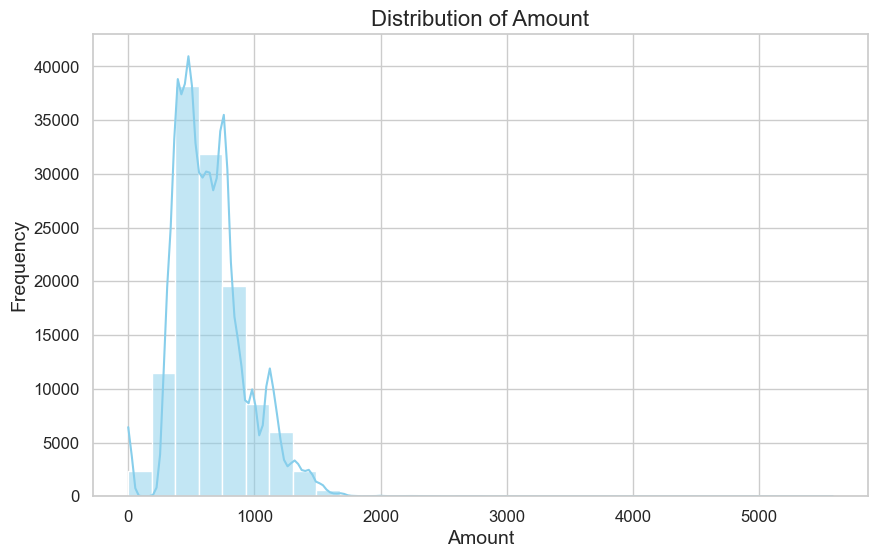

In [6]:
#Visualize Distribution of Key Features:
sns.set(style="whitegrid")

# Plot histogram for the 'Amount' column using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Amount', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

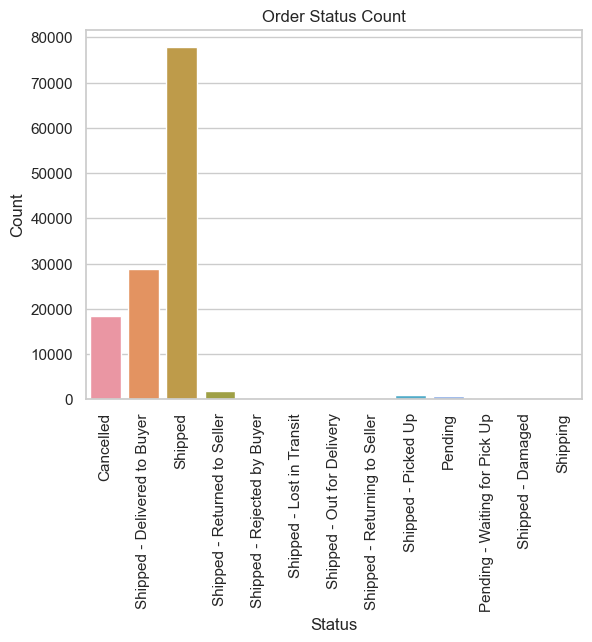

In [7]:
# Plot bar plot for the 'Status' column with vertical labels
sns.countplot(x='Status', data=df)
plt.title('Order Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x-axis labels to vertical
plt.show()


# Data Preprocessing

In [8]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Columns with missing values:")
print(missing_data[missing_data['Missing Values'] > 0])


Columns with missing values:
                  Missing Values  Percentage
Courier Status              6872    5.328164
currency                    7795    6.043807
Amount                      7795    6.043807
ship-city                     33    0.025586
ship-state                    33    0.025586
ship-postal-code              33    0.025586
ship-country                  33    0.025586
promotion-ids              49153   38.110487
fulfilled-by               89698   69.546811
Unnamed: 22                49050   38.030626


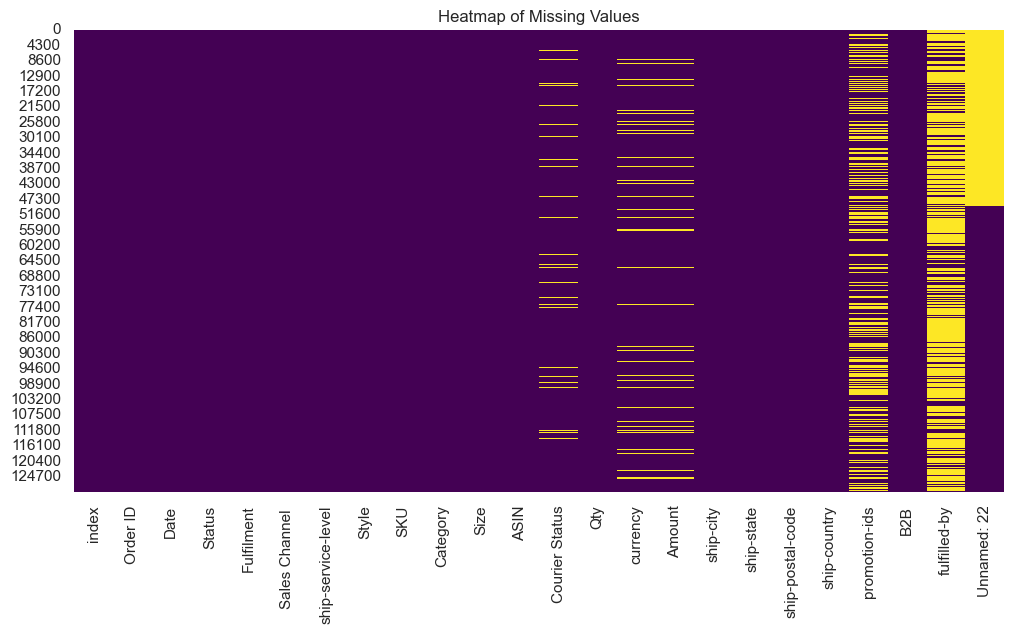

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [10]:
# Handling missing values
# Drop columns with more than 50% missing values
columns_to_drop = missing_data[missing_data['Percentage'] > 50].index
df.drop(columns=columns_to_drop, inplace=True)

# Drop the 'Unnamed: 22' column (has no meaning)
df.drop(columns=['Unnamed: 22'], inplace=True)


# Drop rows with missing values in essential columns
essential_columns = ['Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
df.dropna(subset=essential_columns, inplace=True)

# Fill missing values in numerical columns with median
numerical_columns = ['Amount']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing values in categorical columns with mode
categorical_columns = ['currency', 'Courier Status']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in remaining columns with a placeholder
remaining_columns = df.columns[df.isnull().any()]
for col in remaining_columns:
    df[col].fillna('Unknown', inplace=True)

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_Amazon_Sale_Report.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to '{cleaned_file_path}'.")

# Display cleaned data info
print("\nData after handling missing values:")
print(df.info())

Cleaned data saved to 'cleaned_Amazon_Sale_Report.csv'.

Data after handling missing values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 121149 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121149 non-null  int64  
 1   Order ID            121149 non-null  object 
 2   Date                121149 non-null  object 
 3   Status              121149 non-null  object 
 4   Fulfilment          121149 non-null  object 
 5   Sales Channel       121149 non-null  object 
 6   ship-service-level  121149 non-null  object 
 7   Style               121149 non-null  object 
 8   SKU                 121149 non-null  object 
 9   Category            121149 non-null  object 
 10  Size                121149 non-null  object 
 11  ASIN                121149 non-null  object 
 12  Courier Status      121149 non-null  object 
 13  Qty                 121149 non-null  int6

# Data Type Conversion:

In [11]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,Unknown,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,Unknown,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,Unknown,False


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'ship-postal-code' to int
df['ship-postal-code'] = df['ship-postal-code'].astype(int)

# Convert categorical columns to category type
categorical_columns = ['Status', 'Fulfilment', 'ship-service-level', 
                       'Style', 'SKU', 'Category', 'Size', 'ASIN', 
                       'Courier Status', 'currency', 'ship-city', 
                       'ship-state', 'ship-country', 'promotion-ids']

# Check if the columns exist before converting
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_Amazon_Sale_Report.csv'
df.to_csv(cleaned_file_path, index=False)

# Display data types after conversion
print("\nData types after conversion:")
print(df.info())



Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 121149 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121149 non-null  int64         
 1   Order ID            121149 non-null  object        
 2   Date                121149 non-null  datetime64[ns]
 3   Status              121149 non-null  category      
 4   Fulfilment          121149 non-null  category      
 5   Sales Channel       121149 non-null  object        
 6   ship-service-level  121149 non-null  category      
 7   Style               121149 non-null  category      
 8   SKU                 121149 non-null  category      
 9   Category            121149 non-null  category      
 10  Size                121149 non-null  category      
 11  ASIN                121149 non-null  category      
 12  Courier Status      121149 non-null  category      
 13 

# Outlier Detection and Treatment:

In [13]:
numerical_columns = ['Qty', 'Amount']

# Function to create box plots for each column
def plot_box_comparison(df, columns, title):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()



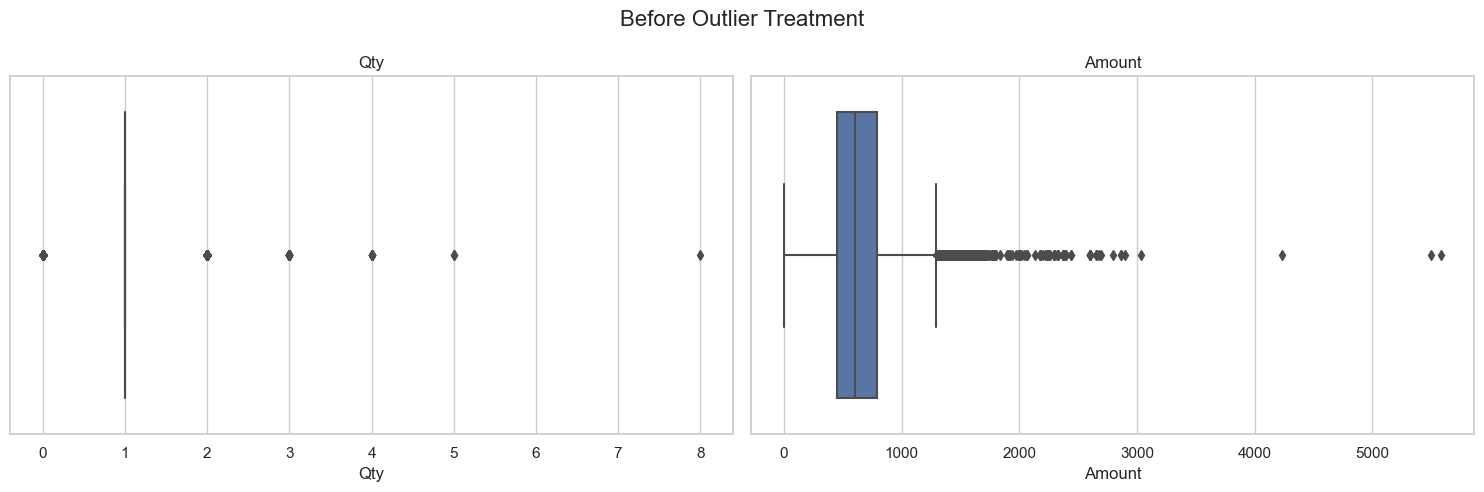

In [14]:
plot_box_comparison(df, numerical_columns, "Before Outlier Treatment")

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_qty = df['Qty'].quantile(0.25)
Q3_qty = df['Qty'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

Q1_amount = df['Amount'].quantile(0.25)
Q3_amount = df['Amount'].quantile(0.75)
IQR_amount = Q3_amount - Q1_amount

# Define lower and upper bounds for outliers
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

lower_bound_amount = Q1_amount - 1.5 * IQR_amount
upper_bound_amount = Q3_amount + 1.5 * IQR_amount


In [16]:
df['Qty'] = np.where(df['Qty'] > upper_bound_qty, upper_bound_qty, df['Qty'])
df['Qty'] = np.where(df['Qty'] < lower_bound_qty, lower_bound_qty, df['Qty'])

# Cap values for 'Amount'
df['Amount'] = np.where(df['Amount'] > upper_bound_amount, upper_bound_amount, df['Amount'])
df['Amount'] = np.where(df['Amount'] < lower_bound_amount, lower_bound_amount, df['Amount'])

# Save the changes back to the file
df.to_csv('cleaned_Amazon_Sale_Report.csv', index=False)

print("Outliers have been removed and the cleaned dataset has been saved.")

Outliers have been removed and the cleaned dataset has been saved.


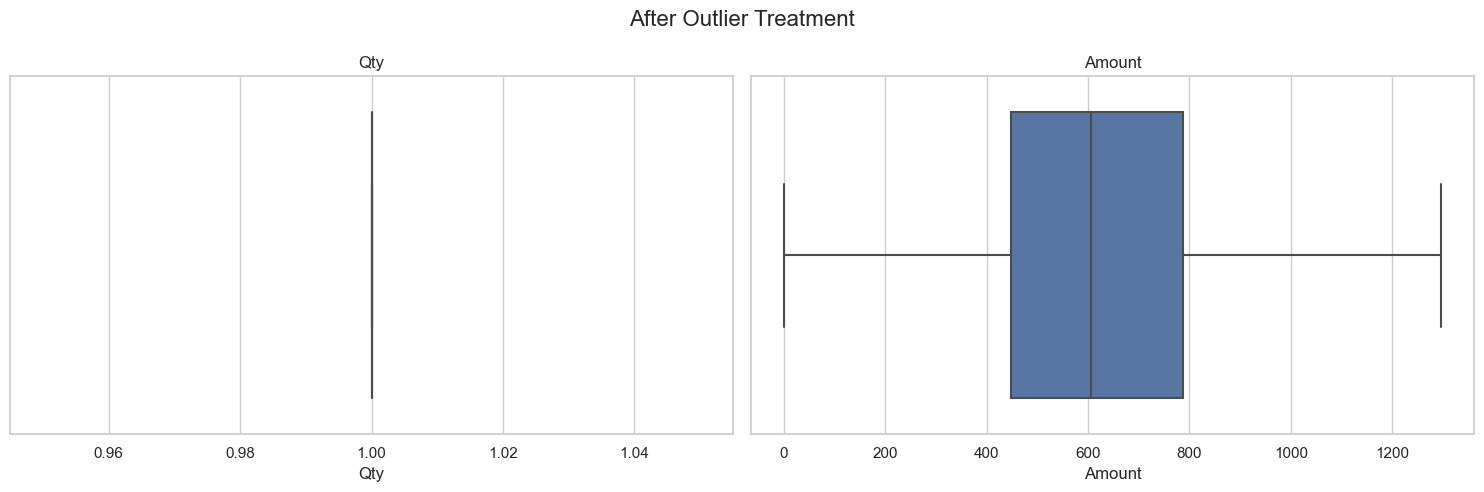

In [17]:
plot_box_comparison(df, numerical_columns, "After Outlier Treatment")

In [18]:
# Display descriptive statistics including all columns
df_description = df.describe(include='all', datetime_is_numeric=True)
df_description

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
count,121149.000000,121149,121149,121149,121149,121149,121149,121149,121149,121149,...,121149,121149.0,121149,121149.000000,121149,121149,121149.000000,121149,121149,121149
unique,NaN,113004,NaN,12,2,1,2,1373,7157,9,...,2,NaN,1,NaN,8704,68,NaN,1,5788,2
top,NaN,403-4984515-8861958,NaN,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,...,Shipped,NaN,INR,NaN,BENGALURU,MAHARASHTRA,NaN,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
freq,NaN,12,NaN,77580,83621,121149,82705,3994,722,47031,...,114594,NaN,121149,NaN,10685,21073,NaN,121149,45748,120306
mean,64483.736259,NaN,2022-05-12 12:10:09.404947712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,644.440568,NaN,NaN,463652.687525,NaN,NaN,NaN
min,0.000000,NaN,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,0.000000,NaN,NaN,110001.000000,NaN,NaN,NaN
25%,32290.000000,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,449.000000,NaN,NaN,382421.000000,NaN,NaN,NaN
50%,64474.000000,NaN,2022-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,605.000000,NaN,NaN,500032.000000,NaN,NaN,NaN
75%,96681.000000,NaN,2022-06-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,788.000000,NaN,NaN,600021.000000,NaN,NaN,NaN
max,128974.000000,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1296.500000,NaN,NaN,989898.000000,NaN,NaN,NaN
